In [2]:
import numpy as np
import h5py
from tools import *
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt 
from scipy.integrate import simps
import seaborn as sns
from scipy import signal as signal_processing

In [3]:
h5_datas = h5py.File("../ml_project_data/h5/X_train.h5/X_train.h5","r")

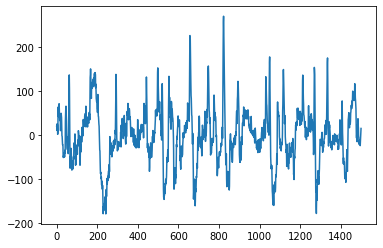

In [82]:
sf = 50
eeg_1_6 = h5_datas["eeg_1"][1028]
time = np.arange(eeg_1_6.size) / sf
plt.plot(eeg_1_6)

In [4]:
time

array([0.000e+00, 2.000e-02, 4.000e-02, ..., 2.994e+01, 2.996e+01,
       2.998e+01])

In [5]:
splited=split(eeg_1_6,30)

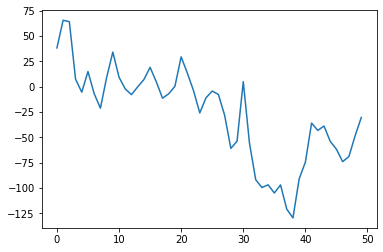

In [6]:
plt.plot(splited[1])

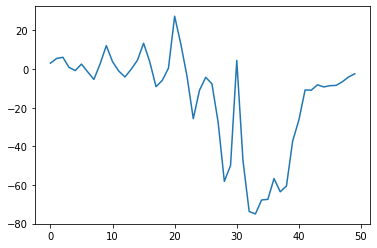

In [7]:
taped = np.hamming(50)*splited
plt.plot(taped[1])

Text(0.5, 1.0, 'Power spectrum (np.fft.fft)')

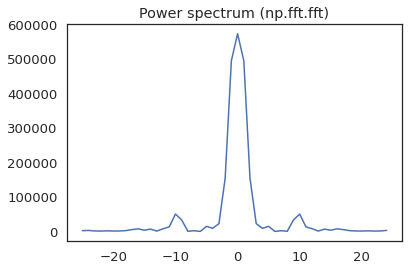

In [8]:
signal = taped[1]
# np.fft.fft
sns.set(font_scale=1.2, style='white')
freqs = np.fft.fftfreq(signal.size, 1/sf)
idx = np.argsort(freqs)
psd = np.abs(np.fft.fft(signal))**2
plt.figure()
plt.plot(freqs[idx], psd[idx])
plt.title('Power spectrum (np.fft.fft)')

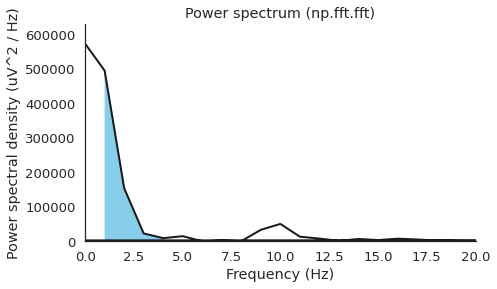

In [9]:
# Define delta lower and upper limits
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 20])
plt.ylim([0, psd.max() * 1.1])
plt.title('Power spectrum (np.fft.fft)')
sns.despine()

In [10]:
# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta],freqs[idx_delta])
print('Absolute delta power: %.3f uV^2' % delta_power)

Absolute delta power: 401352.634 uV^2


In [11]:
# Relative delta power (expressed as a percentage of total power)
total_power = simps(psd, freqs)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Relative delta power: 0.233


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]


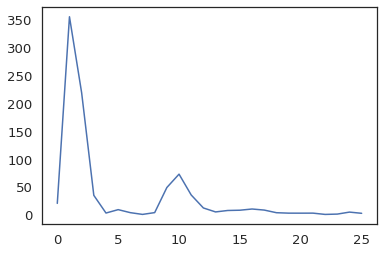

In [12]:
win = 4 * sf
freqs, psd = signal_processing.welch(signal, sf, nperseg=win)
plt.plot(freqs, psd)
print(freqs)

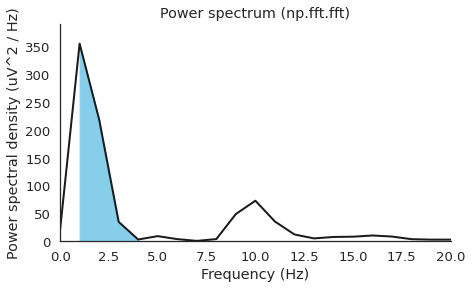

In [13]:
freq_res = freqs[1] - freqs[0]
total_power = simps(psd, dx=freq_res)
idx = np.logical_and(freqs >= low, freqs <= high)
power = simps(psd[idx], dx=freq_res)
# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 20])
plt.ylim([0, psd.max() * 1.1])
plt.title('Power spectrum (np.fft.fft)')
sns.despine()

In [14]:
from constant import *
print(POWER_BANDS)
treat_record_welch(eeg_1_6,POWER_BANDS,sf)

{'delta': [0.5, 4], 'theta': [4, 8], 'alpha': [8, 12], 'beta': [12, 30]}


{'delta': 0.6084171,
 'theta': 0.111502655,
 'alpha': 0.037724916,
 'beta': 0.026325561}

In [15]:
print(POWER_BANDS)
treat_record_fft(eeg_1_6,POWER_BANDS,sf,methode="fft")

{'delta': [0.5, 4], 'theta': [4, 8], 'alpha': [8, 12], 'beta': [12, 30]}


{'delta': 0.42996117576951043,
 'theta': 0.10699442181972954,
 'alpha': 0.03328036886556439,
 'beta': 0.024200407722206295}